In [2]:
%matplotlib notebook



In [299]:
fp = open("in.csv", "r")
lines = fp.readlines()
fp.close()

In [300]:
import math

data = {}
target_scan = [0]
target_sensors = range(0,64)

xx = []
yy = []
zz = []

for i in range(0,64):
    data[i] = 0
for ln in lines:
    if ln.startswith("-"):
        continue
    ln = ln.split(",")
    sensor = int(ln[1])
    scan = int(float(ln[0]))
    
    if len(ln[0]) < 5:
        continue
    if scan not in target_scan:
        continue
    if sensor not in target_sensors:
        continue
    x = float(ln[2])
    y = float(ln[3])
    z = float(ln[4].strip())
    
    dst = math.sqrt(x*x + y*y + z*z)
    data[sensor] = max([data[sensor], dst])
    if data[sensor] == dst:
        yy.append(y)
        xx.append(x)
        zz.append(z)
    
    
print(data)

{0: 120.00054121321583, 1: 120.00055733715381, 2: 120.00064865719703, 3: 120.0009279361374, 4: 120.00065674576015, 5: 120.00089189798001, 6: 120.00094934418331, 7: 120.00048717250641, 8: 120.00077556759268, 9: 120.00094279175353, 10: 120.00094111260756, 11: 120.0004965901725, 12: 120.00082390581234, 13: 120.00050121836932, 14: 120.00067368654695, 15: 120.00052393178431, 16: 120.00047541589998, 17: 120.0005567658168, 18: 120.00055254291075, 19: 120.0006523715208, 20: 120.00085763747367, 21: 120.00055479840991, 22: 120.00052137827613, 23: 120.00093491831986, 24: 120.00091200389951, 25: 120.00061927320962, 26: 120.0005855515114, 27: 120.00084703783271, 28: 120.00054928457381, 29: 120.00056715932774, 30: 120.00093360233663, 31: 120.0005552450023, 32: 120.00092814207784, 33: 120.00063162876961, 34: 120.0005666580718, 35: 102.65611586660305, 36: 83.65978328779082, 37: 70.62156049922393, 38: 53.86612255429865, 39: 48.16612653662178, 40: 43.55832108747043, 41: 36.56966412337542, 42: 33.8555840

In [301]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

xs = []
ys = []
zs = []

errors = {
    0:0.005,
    1:0.005,
    2:0.005,
    3:0.005,
    4:0.005,
    5:0.005,
    6:0.005,
    7:0.005,
    8:0.005,
    9:0.005,
    10:0.005,
    11:0.005,
    12:0.005,
    13:0.005,
    14:0.005,
    15:0.005,
    16:0.005,
    17:0.005,
    18:0.005,
    19:0.005,
    20:0.005,
    21:0.005,
    22:0.005,
    23:0.005,
    24:0.005,
    25:0.005,
    26:0.005,
    27:0.005,
    28:0.005,
    29:0.005,
    30:0.005,
    31:0.005,
    32:0.005,
    33:0.005,
    34:0.1,
    35:0.1,
    36:0.1,
    37:0.1,
    38:0.1,
    39:0.1,
    40:0.1,
    41:0.1,
    42:0.1,
    43:0.1,
    44:0.1,
    45:0.1,
    46:0.1,
    47:0.1,
    48:0.1,
    49:0.1,
    50:0.1,
    51:0.1,
    52:0.1,
    53:0.1,
    54:0.1,
    55:0.1,
    56:0.1,
    57:0.1,
    58:0.1,
    59:0.1,
    60:0.1,
    61:0.1,
    62:0.1,
    63:0.1,
}

target_scan = [0]
target_sensors = range(0,64)

for ln in lines:
    if ln.startswith("-"):
        continue
    ln = ln.split(",")
    
    sensor = int(ln[1])
    scan = int(float(ln[0]))
    if len(ln[0]) < 5:
        continue
    if scan not in target_scan:
        continue
    if sensor not in target_sensors:
        continue
    x = float(ln[2])
    y = float(ln[3])
    z = float(ln[4].strip())
    
    dst = math.sqrt(x*x + y*y + z*z)
    if abs(dst - data[sensor]) < errors[sensor]:
        continue
    if abs(dst - 0) < errors[sensor]:
        continue
    
    xs.append(x)
    ys.append(y)
    zs.append(z)
    
    

In [302]:
print (max(xs))
print (min(xs))
print (max(ys))
print (min(ys))
print (max(zs))
print (min(zs))

62.133507
15.562455
-0.632297
-2.942005
-16.381071
-55.320042


In [303]:
OUTPUT = True
if OUTPUT:
    fp = open("out.csv", "w")
    fp.write("x,y,z\n")
    for i in range(len(xs)):
        fp.write("{0},{1},{2}\n".format(xs[i], ys[i], zs[i]))
    fp.close()

<IPython.core.display.Javascript object>


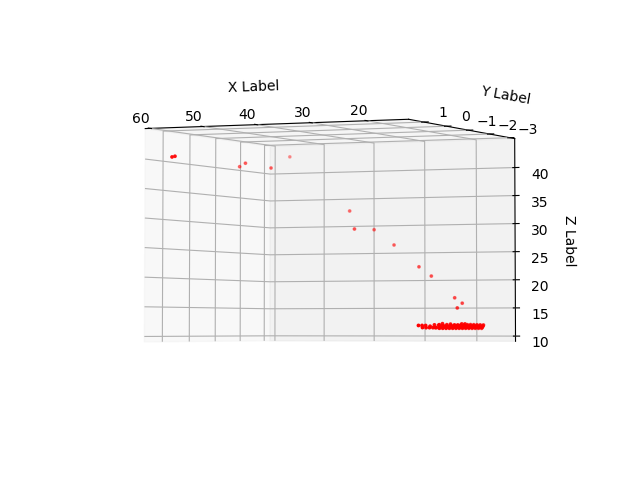

In [297]:

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(xs, ys, zs, c='r', marker='o', s=3)
        
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()